<a href="https://colab.research.google.com/github/shilphypg/DSA_ICTAK/blob/main/Real_Estate_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [270]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
#load the dataset
df=pd.read_excel('/content/dataset.xlsx')
# To display the first five rows of the dataset
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [272]:
#to identify the numbe of rows and colmnns of the dataframe
df.shape

(32536, 12)

In [273]:
#to get an overview of the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB


In [274]:
#to understand the statistics summary of the numerical columns
df.describe()

,Unnamed: 0,Price,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude
count,32536.000000,3.253600e+04,32536.000000,32521.000000,32521.000000,32533.000000,32527.000000,32527.000000,32526.000000,32527.000000
mean,25966.194308,2.554932e+09,3.524158,2.527721,1.052120,181.392002,179.397485,8.988533,-6.923486,107.625922
std,15468.621566,1.879994e+09,1.235943,1.074318,0.796993,107.491313,108.516303,0.821016,0.051064,0.075701
min,0.000000,1.020000e+07,1.000000,1.000000,0.000000,37.000000,37.000000,8.000000,-7.230321,107.434849
25%,12565.750000,1.200000e+09,3.000000,2.000000,0.000000,105.000000,100.000000,8.000000,-6.952981,107.590747
50%,25392.000000,2.000000e+09,3.000000,2.000000,1.000000,147.000000,150.000000,9.000000,-6.931934,107.626219
75%,39255.250000,3.365000e+09,4.000000,3.000000,2.000000,225.000000,235.000000,10.000000,-6.886334,107.659881
max,53466.000000,9.700000e+09,8.000000,7.000000,3.000000,612.000000,585.000000,10.000000,-6.734761,107.886580


In [275]:
#to check for missing values if any
df.isna().sum()

,0
Unnamed: 0,0
Price,0
Location,9
Bedroom,0
Bathroom,15
Carport,15
Land,3
Building,9
Month,9
City/Regency,9


In [276]:
# Check unique values in categorical columns
df['Location'].unique()

array(['Padalarang', 'Parongpong', 'Buah Batu', 'Bojongsoang',
       'Bojongloa Kidul', 'Gedebage', 'Lengkong', 'Regol',
       'Bandung Kulon', 'Cibeunying Kaler', 'Andir', 'Margahayu',
       'Bojongloa Kaler', 'Rancasari', 'Antapani', 'Batununggal',
       'Sukasari', 'Arcamanik', nan, 'Soreang', 'Coblong', 'Cibiru',
       'Sukajadi', 'Margaasih', 'Cidadap', 'Cibeunying Kidul', 'Cileunyi',
       'Cicendo', 'Cicalengka', 'Bandung Wetan', 'Ujungberung',
       'Cimenyan', 'Astanaanyar', 'Banjaran', 'Lembang', 'Bandung Kidul',
       'Paseh', 'Baleendah', 'Katapang', 'Rancaekek', 'Kiaracondong',
       'Cinambo', 'Panyileukan', 'Ciparay', 'Babakan Ciparay', 'Ngamprah',
       'Mandalajati', 'Cisarua', 'Pameungpeuk', 'Cangkuang', 'Cimaung',
       'Dayeuhkolot', 'Cilengkrang', 'Sumur Bandung', 'Kutawaringin',
       'Ciwidey', 'Batujajar', 'Cikalong Wetan', 'Kertasari',
       'Pasirjambu', 'Arjasari', 'Majalaya', 'Nagreg', 'Cililin',
       'Rancabali', 'Cikancung', 'Cipeundeuy'], d

In [277]:
# Count of unique values in each categorical column
df['Location'].value_counts()

,count
Location,
Buah Batu,2781
Padalarang,2560
Sukasari,2002
Margaasih,1817
Antapani,1707
...,...
Cikalong Wetan,2
Cililin,2
Rancabali,1


In [278]:
# Check unique values in categorical columns
df['City/Regency'].unique()

array(['West Bandung Regency', 'Bandung City', 'Bandung Regency', nan],
      dtype=object)

In [279]:
# Count of unique values in each categorical column
df['City/Regency'].value_counts()

,count
City/Regency,
Bandung City,23999
Bandung Regency,5080
West Bandung Regency,3448


In [280]:
# Fill missing values by assigning the result directly to the columns
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df['City/Regency'] = df['City/Regency'].fillna(df['City/Regency'].mode()[0])

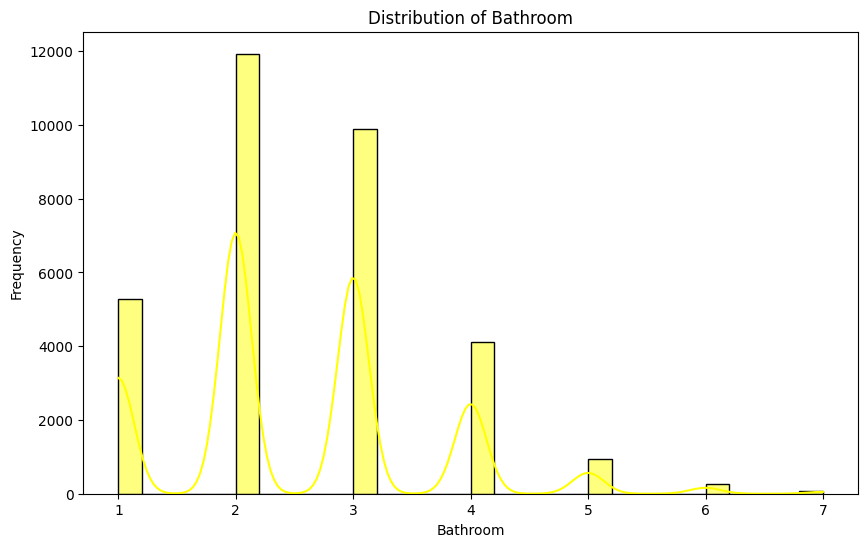

In [281]:
# Visualizing the distribution of the Bathroom column
plt.figure(figsize=(10, 6))
sns.histplot(df['Bathroom'], bins=30, kde=True, color='yellow')
plt.title('Distribution of Bathroom')
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.show()

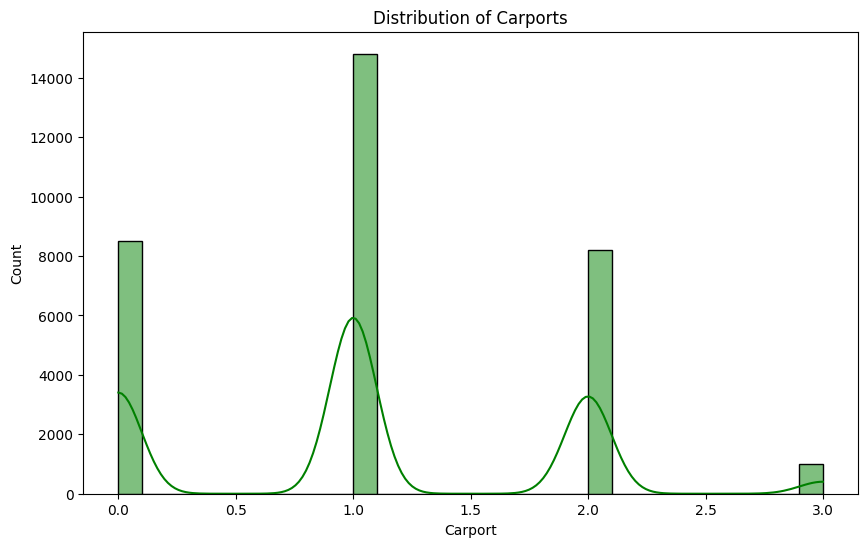

In [282]:
# Visualizing the distribution of the Carport column
plt.figure(figsize=(10, 6))
sns.histplot(df['Carport'], bins=30, kde=True, color='green')
plt.title('Distribution of Carports')
plt.show()

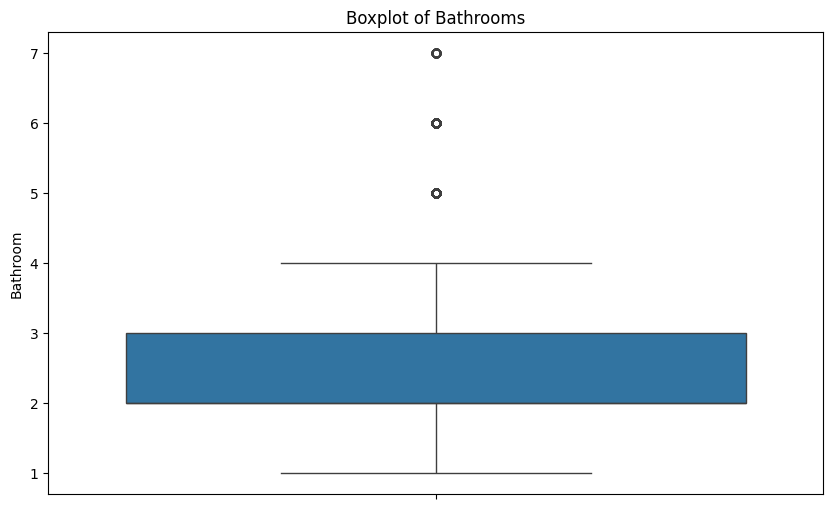

In [283]:
# Checking for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['Bathroom'])
plt.title('Boxplot of Bathrooms')
plt.show()

In [284]:
#fill the missing values
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())

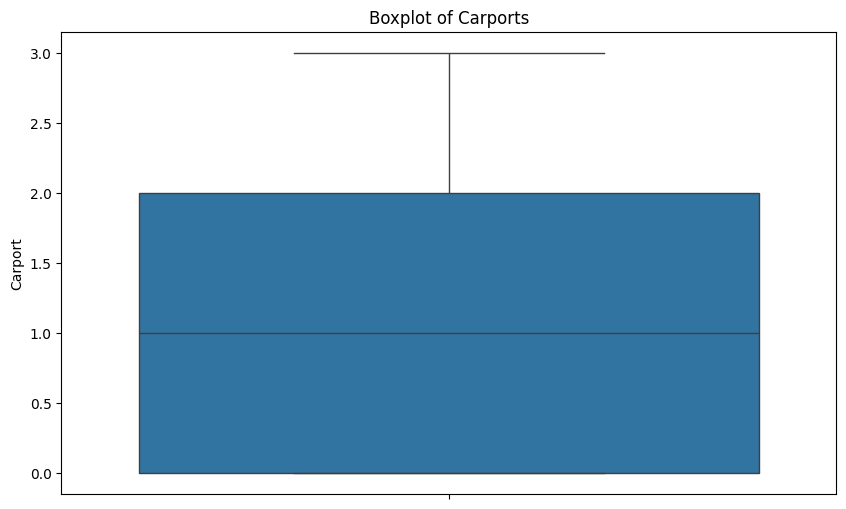

In [285]:
# Checking for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['Carport'])
plt.title('Boxplot of Carports')
plt.show()

In [286]:
#fill the missing values
df['Carport'] = df['Carport'].fillna(df['Carport'].median())

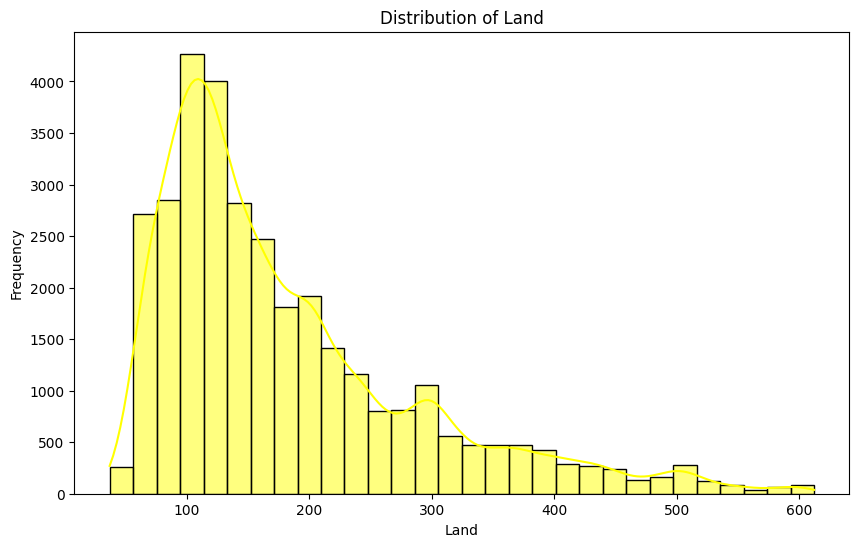

In [287]:
# Distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Land'], bins=30, kde=True, color='yellow')
plt.title('Distribution of Land')
plt.xlabel('Land')
plt.ylabel('Frequency')
plt.show()

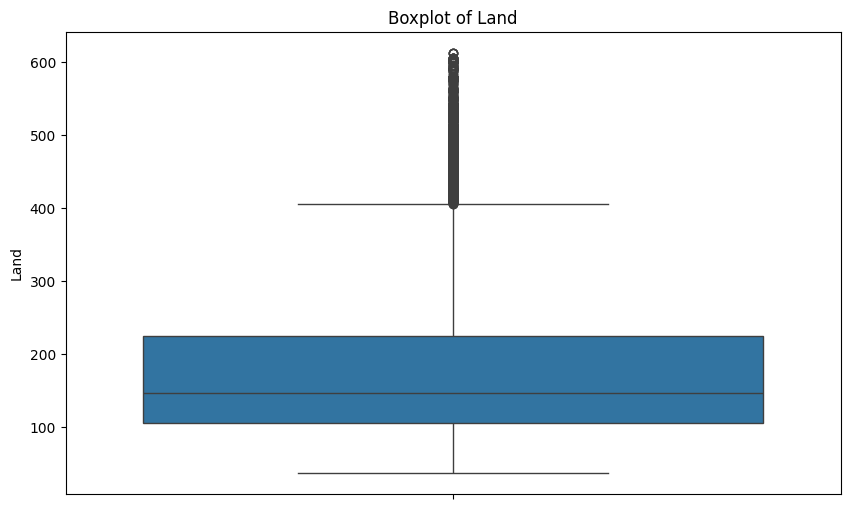

In [288]:
#boxplot for land
plt.figure(figsize=(10, 6))
sns.boxplot(df['Land'])
plt.title('Boxplot of Land')
plt.show()

In [289]:
# Fill missing values in 'Land' with the mean
df['Land'] = df['Land'].fillna(df['Land'].mean())

In [290]:
df.columns

Index(['Unnamed: 0', 'Price', 'Location', 'Bedroom', 'Bathroom', 'Carport',
       'Land', 'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

In [291]:
#drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [292]:
df.columns

Index(['Price', 'Location', 'Bedroom', 'Bathroom', 'Carport', 'Land',
       'Building', 'Month', 'City/Regency', 'Latitude', 'Longitude'],
      dtype='object')

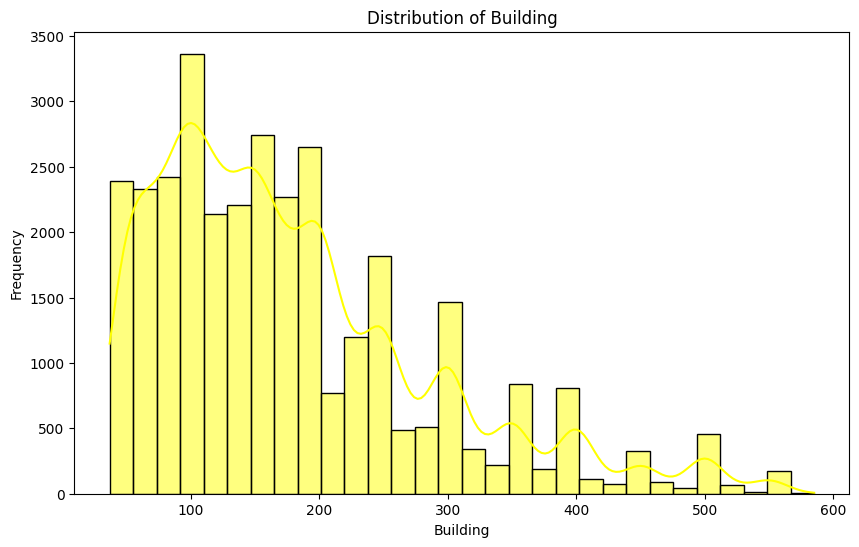

In [293]:
# Distribution of Building
plt.figure(figsize=(10, 6))
sns.histplot(df['Building'], bins=30, kde=True, color='yellow')
plt.title('Distribution of Building')
plt.xlabel('Building')
plt.ylabel('Frequency')
plt.show()

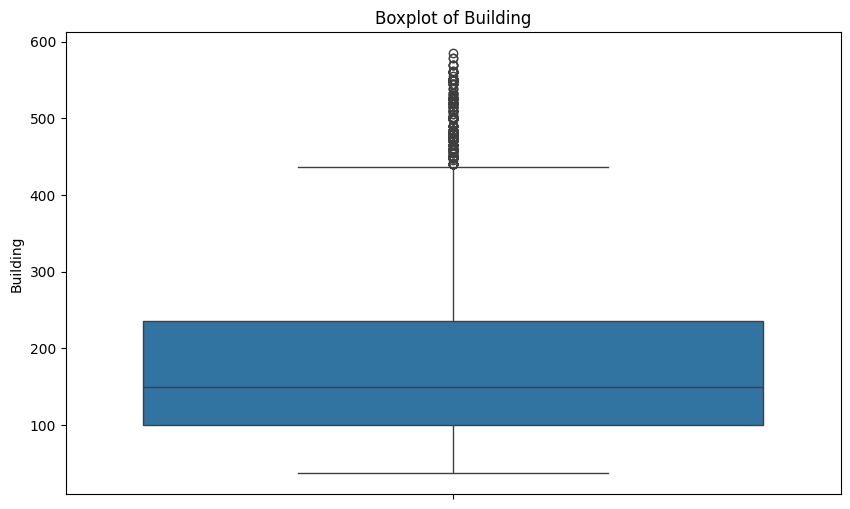

In [294]:
#to plot boxplot of building
plt.figure(figsize=(10, 6))
sns.boxplot(df['Building'])
plt.title('Boxplot of Building')
plt.show()

In [295]:
# Fill missing values in 'Building' with the median
df['Building'] = df['Building'].fillna(df['Building'].median())

In [296]:
df.isna().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,9
City/Regency,0
Latitude,10


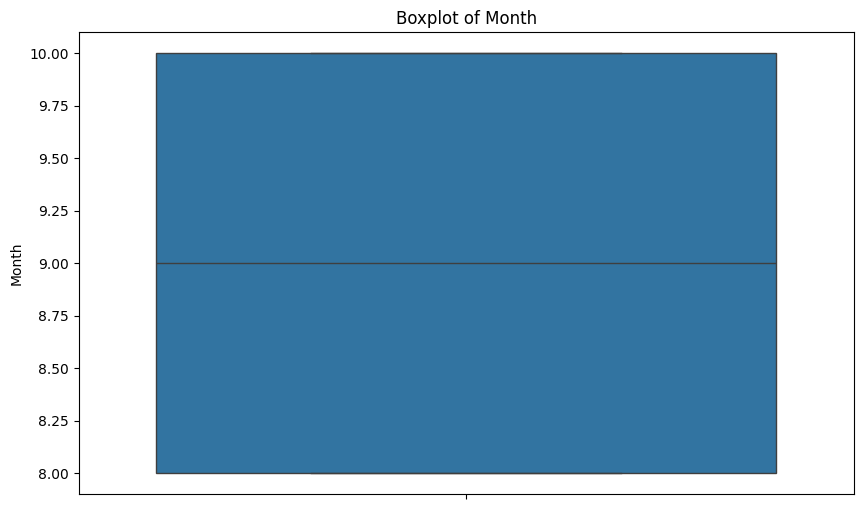

In [297]:
#boxplot for month
plt.figure(figsize=(10, 6))
sns.boxplot(df['Month'])
plt.title('Boxplot of Month')
plt.show()

In [298]:
# Fill missing values in 'Month' with the mean
df['Month'] = df['Month'].fillna(df['Month'].mean())

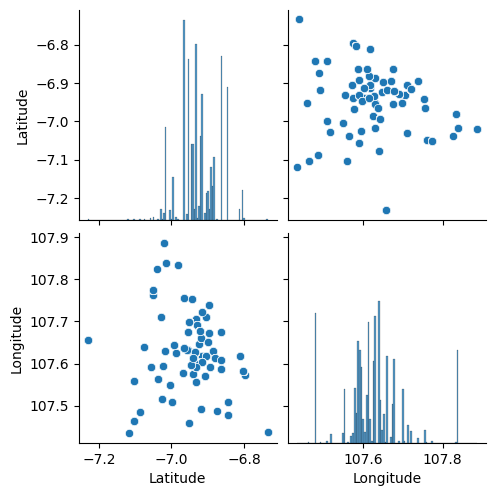

In [299]:
#boxplot for lattitude and longitude
sns.pairplot(df[['Latitude', 'Longitude']])
plt.show()

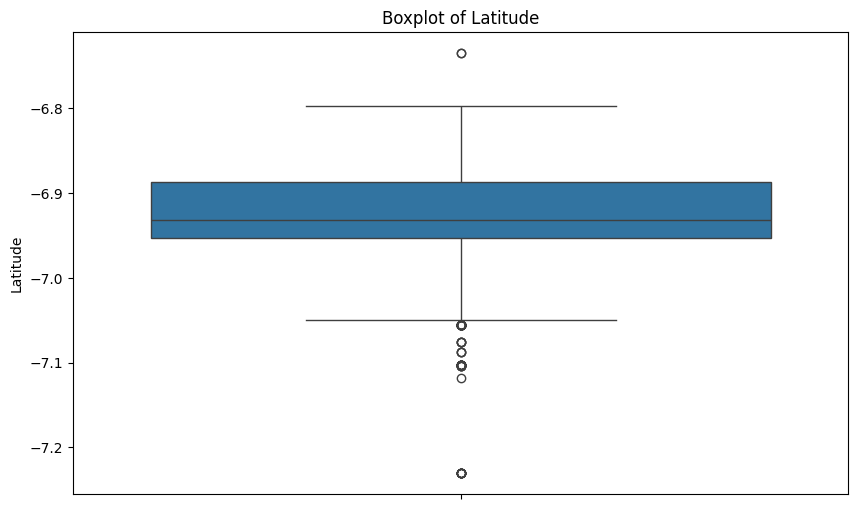

In [300]:
#boxplot for latitude
plt.figure(figsize=(10, 6))
sns.boxplot(df['Latitude'])
plt.title('Boxplot of Latitude')
plt.show()

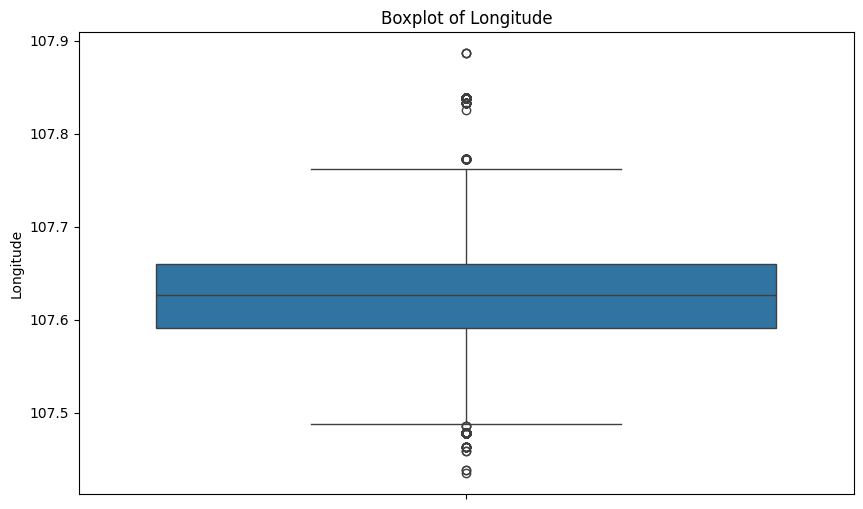

In [301]:
#boxplot for longitude
plt.figure(figsize=(10, 6))
sns.boxplot(df['Longitude'])
plt.title('Boxplot of Longitude')
plt.show()

In [302]:
#fill with meadian
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())

In [303]:
df.isna().sum()

,0
Price,0
Location,0
Bedroom,0
Bathroom,0
Carport,0
Land,0
Building,0
Month,0
City/Regency,0
Latitude,0


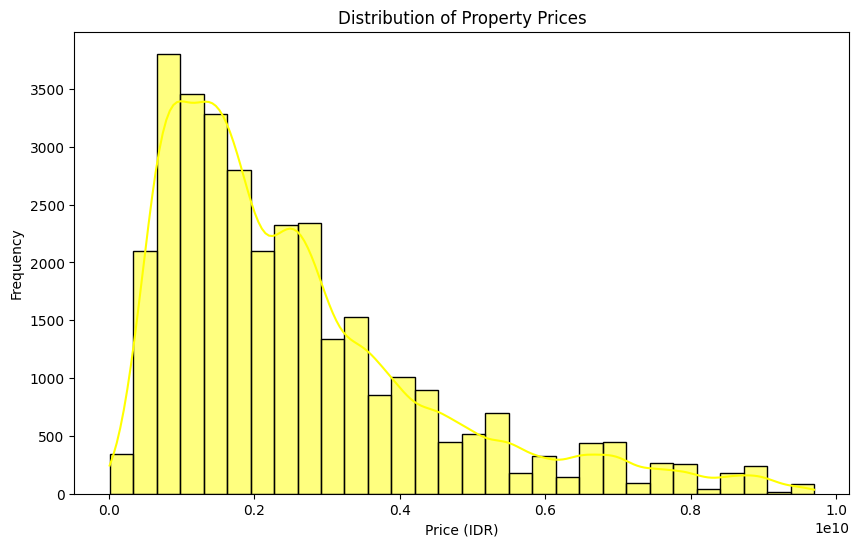

In [304]:
# Distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='yellow')
plt.title('Distribution of Property Prices')
plt.xlabel('Price (IDR)')
plt.ylabel('Frequency')
plt.show()

# **Correlation Between Features**

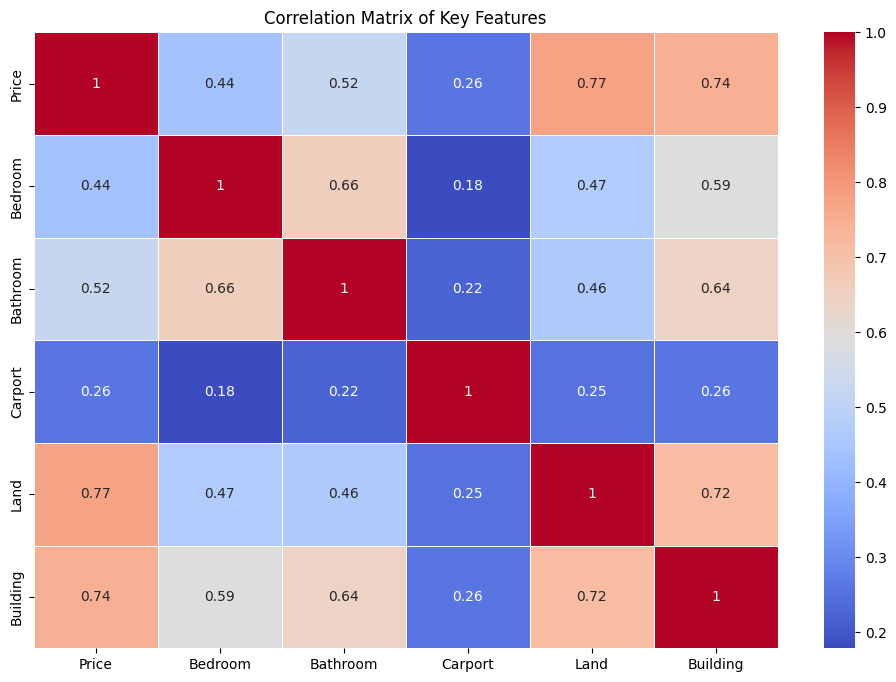

In [305]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df[['Price', 'Bedroom', 'Bathroom', 'Carport', 'Land', 'Building']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Features')
plt.show()

<ipython-input-306-2c86967ec191>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City/Regency', y='Price', data=df, palette='Set2')


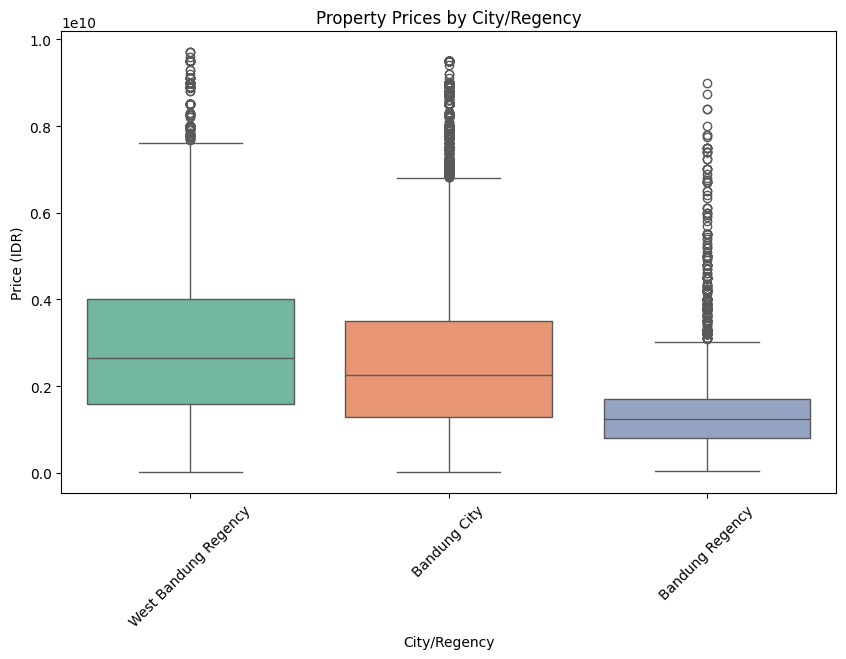

In [306]:
# Boxplot to compare property prices across different locations
plt.figure(figsize=(10, 6))
sns.boxplot(x='City/Regency', y='Price', data=df, palette='Set2')
plt.title('Property Prices by City/Regency')
plt.xticks(rotation=45)
plt.xlabel('City/Regency')
plt.ylabel('Price (IDR)')
plt.show()

In [307]:
#convert 'bathroom' from float to int
df['Bathroom'] = df['Bathroom'].astype(int)

In [308]:
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,2,1,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,8.500000e+08,Parongpong,2,1,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,8.750000e+08,Buah Batu,3,2,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,1.750000e+09,Bojongsoang,2,3,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4.900000e+09,Bojongloa Kidul,4,4,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


In [309]:
df.dtypes

,0
Price,float64
Location,object
Bedroom,int64
Bathroom,int64
Carport,float64
Land,float64
Building,float64
Month,float64
City/Regency,object
Latitude,float64


In [310]:
#scaling the parameters
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Latitude', 'Longitude']] = scaler.fit_transform(df[['Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Latitude', 'Longitude']])
df.head()

,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,1.600000e+09,Padalarang,0.142857,0.000000,0.333333,0.060870,0.023723,8.0,West Bandung Regency,0.780372,0.096410
1,8.500000e+08,Parongpong,0.142857,0.000000,0.333333,0.057391,0.078467,8.0,West Bandung Regency,0.861840,0.325316
2,8.750000e+08,Buah Batu,0.285714,0.166667,0.333333,0.040000,0.060219,8.0,Bandung City,0.534288,0.449553
3,1.750000e+09,Bojongsoang,0.142857,0.333333,0.333333,0.092174,0.104015,8.0,Bandung Regency,0.476989,0.462336
4,4.900000e+09,Bojongloa Kidul,0.428571,0.500000,0.000000,0.283478,0.479927,8.0,Bandung City,0.571646,0.357342


In [311]:
#drop month
df.drop('Month', axis=1, inplace=True)

In [312]:
# Prepare the data for modeling
features = ['Bedroom', 'Bathroom', 'Carport', 'Land', 'Building', 'Latitude', 'Longitude']
X = df[features]
y = df['Price']

In [313]:
X.head()

,Bedroom,Bathroom,Carport,Land,Building,Latitude,Longitude
0,0.142857,0.000000,0.333333,0.060870,0.023723,0.780372,0.096410
1,0.142857,0.000000,0.333333,0.057391,0.078467,0.861840,0.325316
2,0.285714,0.166667,0.333333,0.040000,0.060219,0.534288,0.449553
3,0.142857,0.333333,0.333333,0.092174,0.104015,0.476989,0.462336
4,0.428571,0.500000,0.000000,0.283478,0.479927,0.571646,0.357342


In [314]:
y.head()

,Price
0,1.600000e+09
1,8.500000e+08
2,8.750000e+08
3,1.750000e+09
4,4.900000e+09


In [315]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
X_train.head()

,Bedroom,Bathroom,Carport,Land,Building,Latitude,Longitude
32215,0.571429,0.166667,0.000000,0.111304,0.224453,0.601329,0.345114
31639,0.142857,0.166667,0.000000,0.144348,0.096715,0.534288,0.449553
5455,0.285714,0.166667,0.000000,0.154783,0.200730,0.780372,0.096410
19690,0.428571,0.333333,0.666667,0.826087,0.671533,0.705036,0.396414
25902,0.428571,0.500000,0.666667,0.189565,0.392336,0.571646,0.357342


In [317]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Train a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [318]:
# Output the evaluation results
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print(f'MSE: {mse}')

RMSE: 603714019.3725504
R^2: 0.8929607063120121
MSE: 3.644706171869601e+17


In [319]:
#use linear regression
from sklearn.linear_model import LinearRegression
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1.0407376728978716e+18
R^2 Score: 0.6943516975901396


In [320]:
# To view predicted values alongside actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

             Actual     Predicted
3643   1.420000e+09  2.026798e+09
25320  1.600000e+09  2.342535e+09
9401   3.200000e+09  2.252195e+09
17902  1.400000e+09  2.474106e+09
5198   6.800000e+09  3.362516e+09
...             ...           ...
8213   2.200000e+09  2.830382e+09
30582  4.500000e+09  5.239987e+09
5514   7.750000e+08  1.089395e+09
23856  7.500000e+08  1.205359e+09
29035  1.650000e+09  1.618701e+09

[6508 rows x 2 columns]


In [321]:
from sklearn.ensemble import RandomForestRegressor
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 3.644706171869601e+17
R^2 Score: 0.8929607063120121


In [322]:
# To view predicted values alongside actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

             Actual     Predicted
3643   1.420000e+09  1.363963e+09
25320  1.600000e+09  2.239613e+09
9401   3.200000e+09  2.827733e+09
17902  1.400000e+09  1.454322e+09
5198   6.800000e+09  4.240492e+09
...             ...           ...
8213   2.200000e+09  2.913017e+09
30582  4.500000e+09  4.465500e+09
5514   7.750000e+08  8.241567e+08
23856  7.500000e+08  7.985450e+08
29035  1.650000e+09  1.738200e+09

[6508 rows x 2 columns]


In [323]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1.0407376727779625e+18
R^2 Score: 0.694351697625355


In [324]:
# To view predicted values alongside actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

             Actual     Predicted
3643   1.420000e+09  2.026798e+09
25320  1.600000e+09  2.342535e+09
9401   3.200000e+09  2.252195e+09
17902  1.400000e+09  2.474106e+09
5198   6.800000e+09  3.362516e+09
...             ...           ...
8213   2.200000e+09  2.830382e+09
30582  4.500000e+09  5.239987e+09
5514   7.750000e+08  1.089395e+09
23856  7.500000e+08  1.205359e+09
29035  1.650000e+09  1.618701e+09

[6508 rows x 2 columns]


In [326]:
from sklearn.tree import DecisionTreeRegressor
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# To view predicted values alongside actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

Mean Squared Error: 6.363016710866176e+17
R^2 Score: 0.8131281968042422
             Actual     Predicted
3643   1.420000e+09  1.420000e+09
25320  1.600000e+09  2.275000e+09
9401   3.200000e+09  2.900000e+09
17902  1.400000e+09  1.450000e+09
5198   6.800000e+09  4.625000e+09
...             ...           ...
8213   2.200000e+09  3.800000e+09
30582  4.500000e+09  4.500000e+09
5514   7.750000e+08  7.750000e+08
23856  7.500000e+08  7.500000e+08
29035  1.650000e+09  1.650000e+09

[6508 rows x 2 columns]


# Model Performance Comparison
**Linear Regression**

Mean Squared Error (MSE):
3.64
×
1
0
17
3.64×10
17

R² Score:
0.69
0.69


**Lasso Regression**

Mean Squared Error (MSE):
1.04
×
1
0
18
1.04×10
18

R² Score:
0.69
0.69


**Decision Tree Regressor**

Mean Squared Error (MSE):
6.36
×
1
0
17
6.36×10
17

R² Score:
0.81
0.81


**Random Forest Regression**

Mean Squared Error (MSE):
3.64
×
1
0
17
3.64×10
17

R² Score:
0.89
0.89

**Inference: **

The Random Forest Regressor is the most robust model for your dataset, demonstrating both accuracy and explanatory power. It successfully captures non-linear relationships and interactions between features, which is often challenging for simpler models like linear regression. Given its performance, you may consider using it as your primary model for predicting real estate prices.